Data Analysis Practice II-E2 

# Final Project

___

* **Name**:  <span style="color:blue">Alexander Hill</span>
* **Student number**:  <span style="color:blue">1090318866</span>
* **Project theme**:  <span style="color:blue">Dengue Fever</span>
* **Project purpose**:  <span style="color:blue">"Analysing various variables regarding Dengue fever in order to learn more about the disease and what influences it."</span>

___

## Dataset description

**Dataset source(s)**

<span style="color:blue">{https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/page/82/}</span>

**Overview**

<span style="color:blue">The data set consists of 1200 rows representing different weeks across 2 cities, San Juan and Iquitos. 25 features are given to explore the number of total Dengue fever cases each week. The features are predominantly weather related like humidity, precipitation and temperature.</span>


**Variables**

<span style="color:blue">**Independent variables:**</span>
* <span style="color:blue">Diurnal temperature range</span>
* <span style="color:blue">Average Temperature</span>
* <span style="color:blue">Precipitation</span>
* <span style="color:blue">City</span>

<span style="color:blue">**Dependent variables:**</span>
* <span style="color:blue">Total Cases</span>



___

## Data parsing using Python

**Python functions used**

* <span style="color:blue">pd.concat()</span>
* <span style="color:blue">pd.DataFrame()</span>
* <span style="color:blue">.dropna()</span>
* <span style="color:blue">.describe()</span>
* <span style="color:blue">.pd.read_csv()</span>
* <span style="color:blue">.astype()</span>




**Overview**

* <span style="color:blue">I used .pd.read_csv() to download the data</span>
* <span style="color:blue">I used pd.DataFrame() to construct the dataframe.</span>
* <span style="color:blue">I used pd.concat() to concatonate the features and the labels</span>
* <span style="color:blue">I used .dropna() to drop rows with null values</span>
* <span style="color:blue">I used .describe() to have a quick look at the different numerical properties of each row</span>
* <span style="color:blue">I used .astype() change the data type of particular columns</span>

**Parsing difficulties**

* <span style="color:blue">The feature 'week_start_date' was string data so I had to convert it to float data before proceeding</span>


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
%matplotlib inline

features_train = pd.read_csv('dengue_features_train.csv')
features_test = pd.read_csv('dengue_features_test.csv')
labels_train = pd.read_csv('dengue_labels_train.csv')

In [2]:
y = labels_train['total_cases']

df = features_train
df = pd.concat([df,y], axis =1)

sj = df.iloc[:,0] == 'sj'
iq = df.iloc[:,0] == 'iq'

In [3]:
datearray = np.array(pd.to_datetime(df['week_start_date'])).astype(float)
df['week_start_date'] = pd.DataFrame(datearray).set_index(df.index)

for n, m in enumerate(list(df['city'].unique())):
    df['city']=df['city'].replace({m: n})       

df = df.dropna()

In [4]:
quicklook = []
for i in range(0,len(df.iloc[0,:])):
    quicklook.append(df.iloc[:,i].describe())
#print(quicklook)  # optional

___

## Analysis Methods

* <span style="color:blue">Linear regression between all variables in dataframe.</span>
* <span style="color:blue">One sample t-test for average temperature between the two cities.</span>
* <span style="color:blue">Two sample t-test for precipitation between the two cities.</span>
* <span style="color:blue">k-means clustering</span>
* <span style="color:blue">Decision Tree Classification</span>



___

## Results

### Dataset description

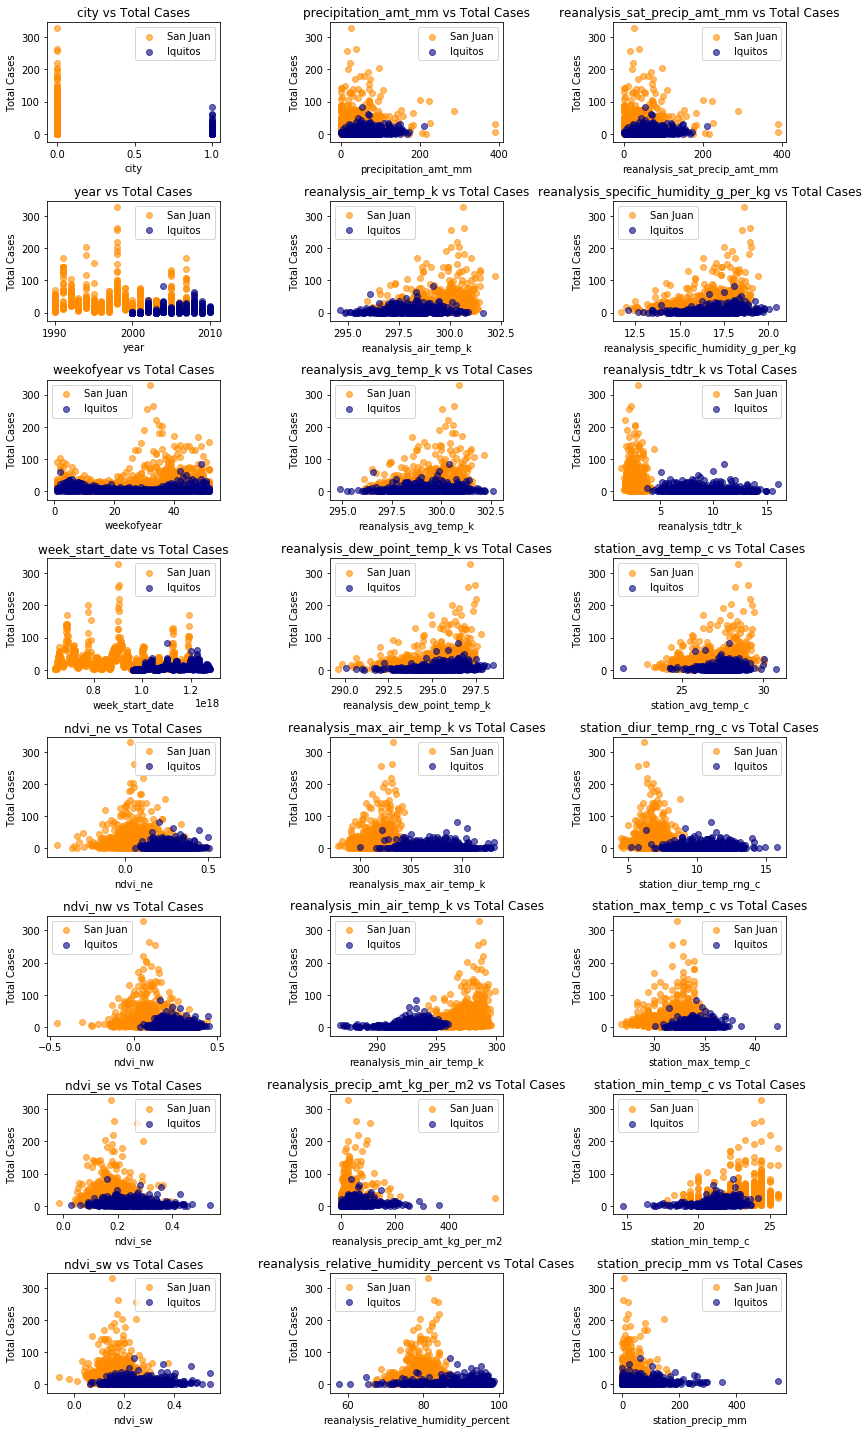

In [5]:
fig,ax = plt.subplots(8,3,figsize = (12,20))

for i in range(0,8):
    for j in range(0,3):
        ax[i,j].scatter(df.iloc[:,i + 8*j][sj],df['total_cases'][sj],color = 'darkorange', label = 'San Juan',alpha =0.6)
        ax[i,j].scatter(df.iloc[:,i + 8*j][iq],df['total_cases'][iq], color = 'navy', label = 'Iquitos',alpha =0.6)
        ax[i,j].set_title(f'{df.columns[i + 8*j]} vs Total Cases')
        ax[i,j].set_xlabel(df.columns[i + 8*j])
        ax[i,j].set_ylabel('Total Cases')
        ax[i,j].legend()
        ax[i,j].locator_params(nbins=4)
        
fig.tight_layout()

C:\Users\alex\Anaconda3 - 2\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\alex\Anaconda3 - 2\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


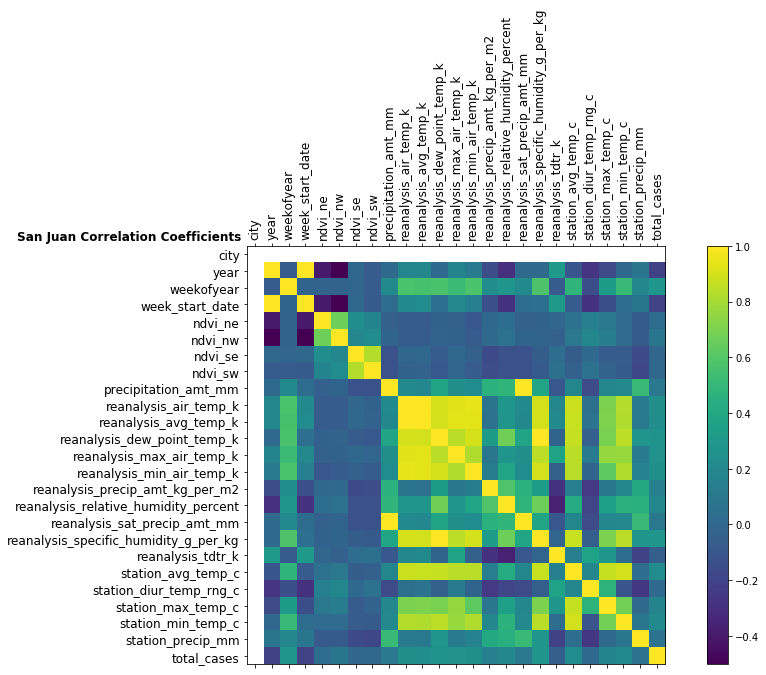

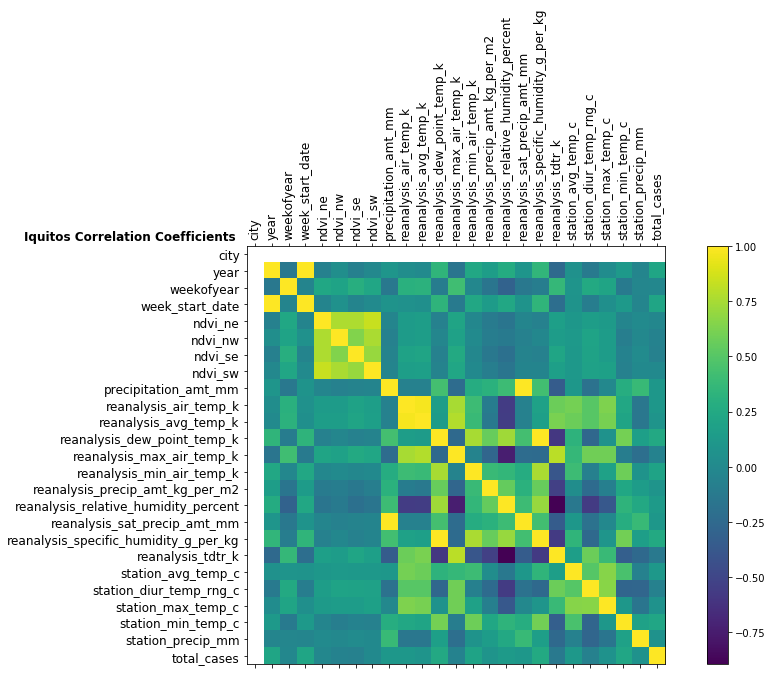

In [6]:
dfsj = df[sj]
dfiq = df[iq]

f = plt.figure(figsize=(15, 7.5))
plt.matshow(dfsj.corr(), fignum=f.number)
plt.xticks(range(0,dfsj.shape[1]), dfsj.columns, fontsize=12, rotation=90)
plt.yticks(range(0,dfsj.shape[1]), dfsj.columns, fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.title('San Juan Correlation Coefficients',x=-0.28, y =0.999,fontweight="bold")


f = plt.figure(figsize=(15, 7.5))
plt.matshow(dfiq.corr(), fignum=f.number)
plt.xticks(range(0,dfiq.shape[1]), dfiq.columns, fontsize=12, rotation=90)
plt.yticks(range(0,dfiq.shape[1]), dfiq.columns, fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.title('Iquitos Correlation Coefficients',x=-0.28, y =0.999,fontweight="bold");


In [7]:
# We can see that there are some clear correlations between some of the variables and the
# number of Dengue fever cases in the two cities, I shall now conduct some statistical
# tests to learn more about the two cities in our data set.

# I am going to use a t-test to see if there is a significant difference in average temperature
# and precipitation between the two cities.

### Hypothesis testing results

p-value = 0.00043

The p-value is smaller than the significance value and thus, the null hypothesis can be rejected, meaning San Juan can be deemed to have a higher average temperature than Iquitos and this may give us some insight into the number of Dengue fever cases across the two cities.


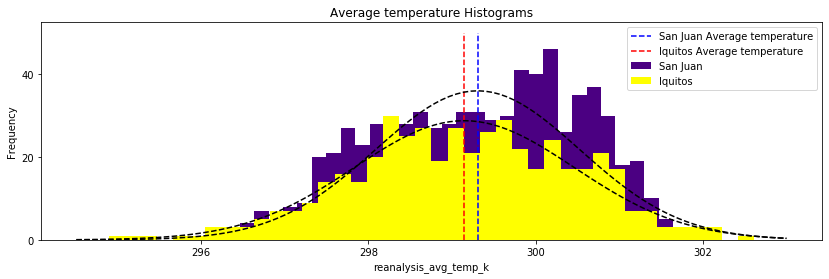

In [8]:
#One sample t-test for average temperature between the two cities.

from scipy.stats import norm
averagetemp = pd.DataFrame({'city' : df['city'], 'average_temp_sj' : df['reanalysis_avg_temp_k']})

average_temp_sj = np.array(df['reanalysis_avg_temp_k'][sj])

average_temp_iq = df['reanalysis_avg_temp_k'][iq]
iq_mean = df['reanalysis_avg_temp_k'][iq].mean()
sj_mean = df['reanalysis_avg_temp_k'][sj].mean()
results = stats.ttest_1samp(average_temp_sj, iq_mean)

sig_val = 0.05

print(f'p-value = {round(results[1],5)}')

if results[1]/2 <= sig_val and sj_mean >= iq_mean:
    print()
    print(f'The p-value is smaller than the significance value and thus, the null hypothesis can be rejected, meaning San Juan can be deemed to have a higher average temperature than Iquitos and this may give us some insight into the number of Dengue fever cases across the two cities.')


plt.figure(figsize = (14,4))

mu, std = norm.fit(df['reanalysis_avg_temp_k'][sj])
mu1, std1 = norm.fit(df['reanalysis_avg_temp_k'][iq])

plt.hist(df['reanalysis_avg_temp_k'][sj], color = 'indigo',label = 'San Juan',bins =35)
plt.hist(df['reanalysis_avg_temp_k'][iq], color ='yellow', label = 'Iquitos',bins=40)
plt.plot([sj_mean,sj_mean],[0,50],color = 'b',linestyle ='--',label = 'San Juan Average temperature',)
plt.plot([iq_mean,iq_mean],[0,50],color = 'r',linestyle ='--',label = 'Iquitos Average temperature',)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, 110*p, 'k', linewidth=1.5,linestyle = '--')

p = norm.pdf(x, mu1, std1)
plt.plot(x, 95*p, 'k', linewidth=1.5,linestyle = '--')



plt.title("Average temperature Histograms")
plt.xlabel('reanalysis_avg_temp_k')
plt.ylabel('Frequency')
plt.legend()
plt.locator_params(nbins=5)


plt.show()

In [9]:
#two sample t test for precipitation between the two cities.
    
prepsj = df['precipitation_amt_mm'][sj]
prepiq = df['precipitation_amt_mm'][iq]

prepsj_mean = prepsj.mean()
prepiq_mean = prepiq.mean()

t,p    = stats.ttest_ind(prepsj, prepiq)

sig_val = 0.05
print()
print(f'p-value = {round(p,35)}')

if p <= sig_val:
    print()
    print(f'The p-value is smaller than the significance value and thus, the null hypothesis can be rejected, meaning San Juan and Iquitos are likely to have different amounts of weekly precipitation. This may give us some insight into the number of Dengue fever cases across the two cities.')


rprep  = (np.corrcoef(df['precipitation_amt_mm'][iq], df['total_cases'][iq])+np.corrcoef(df['precipitation_amt_mm'][sj], df['total_cases'][sj]))/2
print()
print(f'The correlation coefficient between precipitation and total cases is {round(rprep[0][1],3)}, so although the two cities have very different precipitation rates, there are certainly other forces at play here.')


p-value = 8.92e-33

The p-value is smaller than the significance value and thus, the null hypothesis can be rejected, meaning San Juan and Iquitos are likely to have different amounts of weekly precipitation. This may give us some insight into the number of Dengue fever cases across the two cities.

The correlation coefficient between precipitation and total cases is 0.103, so although the two cities have very different precipitation rates, there are certainly other forces at play here.


### Machine learning


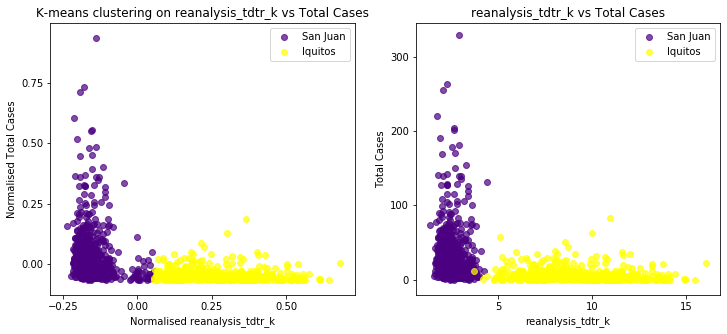

K-means Classification score : 96.6%

K-means does a good job of clustering the data in this example, unfortunately it does still over-classify the San Juan cluster by 41 data points.


In [10]:
#K-means Classification on reanalysis_tdtr_k vs Total Cases

from sklearn.cluster import KMeans

totalcases_normed = (df['total_cases']-df['total_cases'].mean())/df['total_cases'].max()
reanalysis_normed =  (df['reanalysis_tdtr_k']-df['reanalysis_tdtr_k'].mean())/df['reanalysis_tdtr_k'].max()
X = pd.concat([totalcases_normed,reanalysis_normed],axis = 1)
X = np.array(X)

kmeans = KMeans(n_clusters=2, random_state=1)
kmeans.fit(X)
labels = kmeans.labels_

fig,ax = plt.subplots(1,2,figsize = (12,5))
ax[0].scatter(X[:,1][np.array(labels,dtype = bool)],X[:,0][np.array(labels,dtype = bool)], c = 'indigo',label = 'San Juan', alpha = 0.7)
ax[0].scatter(X[:,1][np.invert(np.array(labels,dtype = bool))],X[:,0][np.invert(np.array(labels,dtype = bool))], c ='yellow', alpha = 0.7, label = 'Iquitos')
ax[0].set_title("K-means clustering on reanalysis_tdtr_k vs Total Cases")
ax[0].set_xlabel('Normalised reanalysis_tdtr_k')
ax[0].set_ylabel('Normalised Total Cases')
ax[0].legend()
ax[0].locator_params(nbins=5)

ax[1].scatter(df['reanalysis_tdtr_k'][sj],df['total_cases'][sj],color = 'indigo', label = 'San Juan',alpha =0.7)
ax[1].scatter(df['reanalysis_tdtr_k'][iq],df['total_cases'][iq], color = 'yellow', label = 'Iquitos',alpha =0.7)
ax[1].set_title(f'reanalysis_tdtr_k vs Total Cases')
ax[1].set_xlabel('reanalysis_tdtr_k')
ax[1].set_ylabel('Total Cases')
ax[1].legend()
ax[1].locator_params(nbins=4)

plt.show();

check = df['reanalysis_tdtr_k'][np.invert(np.array(labels,dtype = bool))]
check1 = df['reanalysis_tdtr_k'][np.array(labels,dtype = bool)]

n=df['city'][iq].sum()

for i in df['reanalysis_tdtr_k'][iq].index:
    for j in check.index:
        if i == j:
            n=n-1
            
m=np.array(df['city'][sj]) + 1        
m = pd.DataFrame(m).sum()

for i in df['reanalysis_tdtr_k'][sj].index:
    for j in check1.index:
        if i == j:
            m=m-1
            
score = (1199-m.values[0]-n)/1199

print(f'K-means Classification score : {100*round(score,3)}%')
print()
print("K-means does a good job of clustering the data in this example, unfortunately it does still over-classify the San Juan cluster by 41 data points.")

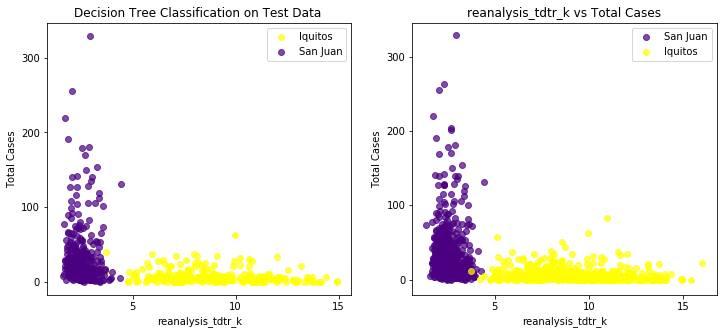

Decision Tree Classification score : 99.5%

The Decision Tree classifier is indeed more accurate, which is to be expected as K-means is an unsupervised machine learning algorithm, whereas Decision Trees are an example of supervised machine learning.


In [11]:
#Decision Tree Classification on reanalysis_tdtr_k vs Total Cases

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


y = df['city'].values[:]

X = pd.concat([df['reanalysis_tdtr_k'],df['total_cases']],axis = 1)
X = np.array(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0, test_size = 0.5)

tree = DecisionTreeClassifier()

tree.fit(X_train, y_train)

labels = tree.predict(X_test)

fig,ax = plt.subplots(1,2,figsize = (12,5))
ax[0].scatter(X_test[:,0][np.array(labels,dtype = bool)],X_test[:,1][np.array(labels,dtype = bool)], c = 'yellow',label = 'Iquitos', alpha = 0.7)
ax[0].scatter(X_test[:,0][np.invert(np.array(labels,dtype = bool))],X_test[:,1][np.invert(np.array(labels,dtype = bool))], c ='indigo', alpha = 0.7, label = 'San Juan')
ax[0].set_title("Decision Tree Classification on Test Data ")
ax[0].set_xlabel('reanalysis_tdtr_k')
ax[0].set_ylabel('Total Cases')
ax[0].legend()
ax[0].locator_params(nbins=5)

ax[1].scatter(df['reanalysis_tdtr_k'][sj],df['total_cases'][sj],color = 'indigo', label = 'San Juan',alpha =0.7)
ax[1].scatter(df['reanalysis_tdtr_k'][iq],df['total_cases'][iq], color = 'yellow', label = 'Iquitos',alpha =0.7)
ax[1].set_title(f'reanalysis_tdtr_k vs Total Cases')
ax[1].set_xlabel('reanalysis_tdtr_k')
ax[1].set_ylabel('Total Cases')
ax[1].legend()
ax[1].locator_params(nbins=4)

plt.show();

print(f'Decision Tree Classification score : {100*round(tree.score(X_test,y_test),3)}%')
print()
print(f'The Decision Tree classifier is indeed more accurate, which is to be expected as K-means is an unsupervised machine learning algorithm, whereas Decision Trees are an example of supervised machine learning.')


___

## Summary

* <span style="color:blue">Linear regression showed that almost all variables had a weak correlation with total cases, and that many of the weather related features had strong correlations.</span>

* <span style="color:blue">One sample t-test showed there was a significant difference in average temperatures between the cities (p-value = 0.00043)</span>
* <span style="color:blue">Two sample t-test showed there was a significant difference in weekly average precipitation between the cities (p-value = 8.92e-33)</span>
* <span style="color:blue">k-means clustering was able to cluster the two cities with a success rate of 96.6% given the variables 'total_cases' and 'reanalysis_tdtr_k'.  </span>
* <span style="color:blue">The Decision Tree Classifier was able to classify the two cities with a success rate of 99.7% given the variables 'total_cases' and 'reanalysis_tdtr_k'.</span>

<span style="color:blue">One of the most important findings was the fact that the cities had very different average temperatures, and this definitely plays a part in the number of weekly Dengue fever cases. The main issue with this problem was that all of the features had relatively weak correlations with the number of cases, so maybe in order to predict the number of cases we would need to look at all of the variables together, possibly in a logistic regression.</span>